In [1]:
from shared.enums import SegmentationStrategy
from dataloaders.DynamicSegmentationDataLoader import DynamicSegmentationDataLoader
from dataloaders.ImagesAndSegmentationDataLoader import ImagesAndSegmentationDataLoader
from dataloaders.SegmentedImagesDataLoader import SegmentedImagesDataLoader
from utils.plot_utils import plot_image_grid
from utils.dataloader_utils import get_dataloder_from_strategy

# SEGMENTATION - SegmentedDataLoader (ground truth, non dynamic)

## With background

Dynamic Load for Segmentation Dataloader: True
LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2161 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2161 images
-- Data Balance (Oversampling) -- Adding 1670 from 2 class..
-- Data Balance (Oversampling) -- Adding 1899 from 4 class..
-- Data Balance (Oversampling) -- Adding 1979 from 3 class..
-- Data Balance (Oversampling) -- Adding 1579 from 1 class..
-- Data Balance (Oversampling) -- Adding 2103 from 5 class..
-- Data Balance (Oversampling) -- Adding 2083 from 6 class..


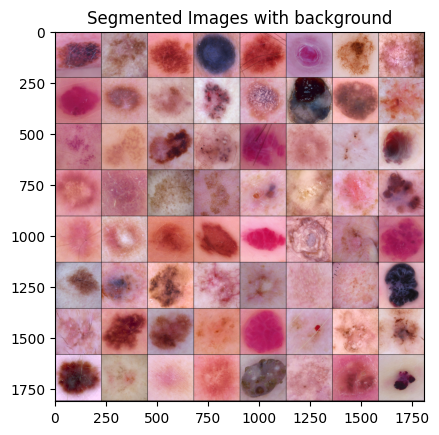

In [2]:
strategy = SegmentationStrategy.SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
        strategy=strategy,
        normalize=False,
        keep_background=True)
train_dataloader, _ = dataloader.get_train_val_dataloders()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Segmented Images with background")

## Without Background

Dynamic Load for Segmentation Dataloader: True
LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2161 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2161 images
-- Data Balance (Oversampling) -- Adding 1670 from 2 class..
-- Data Balance (Oversampling) -- Adding 1899 from 4 class..
-- Data Balance (Oversampling) -- Adding 1979 from 3 class..
-- Data Balance (Oversampling) -- Adding 1579 from 1 class..
-- Data Balance (Oversampling) -- Adding 2103 from 5 class..
-- Data Balance (Oversampling) -- Adding 2083 from 6 class..


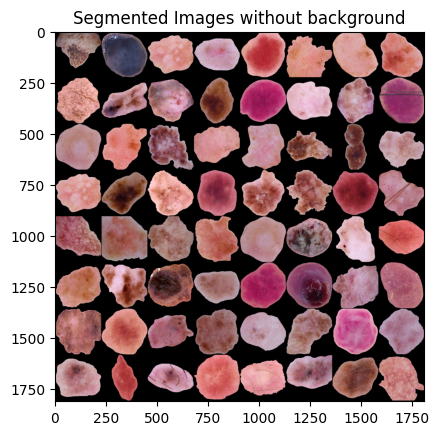

In [3]:
strategy = SegmentationStrategy.SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    normalize=False,
    keep_background=False)
train_dataloader, _ = dataloader.get_train_val_dataloders()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Segmented Images without background")

# NO_SEGMENTATION - ImagesAndLabelsDataLoader

LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2161 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2161 images
-- Data Balance (Oversampling) -- Adding 1670 from 2 class..
-- Data Balance (Oversampling) -- Adding 1899 from 4 class..
-- Data Balance (Oversampling) -- Adding 1979 from 3 class..
-- Data Balance (Oversampling) -- Adding 1579 from 1 class..
-- Data Balance (Oversampling) -- Adding 2103 from 5 class..
-- Data Balance (Oversampling) -- Adding 2083 from 6 class..


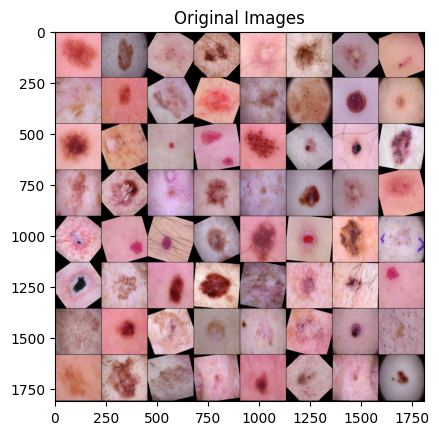

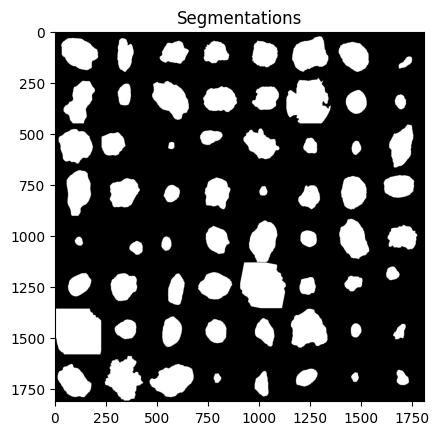

In [4]:
strategy = SegmentationStrategy.NO_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    normalize=False,)
train_dataloader, _ = dataloader.get_train_val_dataloders()
batch = next(iter(train_dataloader))
images, labels, segmentations = batch
plot_image_grid(images, "Original Images")
plot_image_grid(segmentations, "Segmentations")

# DYNAMIC_SEGMENTATION - DynamicSegmentationDataLoader

Note: this is pretty bugged!

## DynamicSegmentationStrategy.OPENCV

LOADED METADATA HAS LENGTH 7470
Metadata before split has length 7470
DF_TRAIN LENGTH: 5976
DF_VAL LENGTH: 1494
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4323 images.
--Data Balance-- The second common class is 1 with 582 images with a difference of 3741 images from the most common class.
--Data Balance (Undersampling)-- Keeping 2161 from 0 class..
--Data Balance (Undersampling)-- 0 now has 2161 images
-- Data Balance (Oversampling) -- Adding 1670 from 2 class..
-- Data Balance (Oversampling) -- Adding 1899 from 4 class..
-- Data Balance (Oversampling) -- Adding 1979 from 3 class..
-- Data Balance (Oversampling) -- Adding 1579 from 1 class..
-- Data Balance (Oversampling) -- Adding 2103 from 5 class..
-- Data Balance (Oversampling) -- Adding 2083 from 6 class..


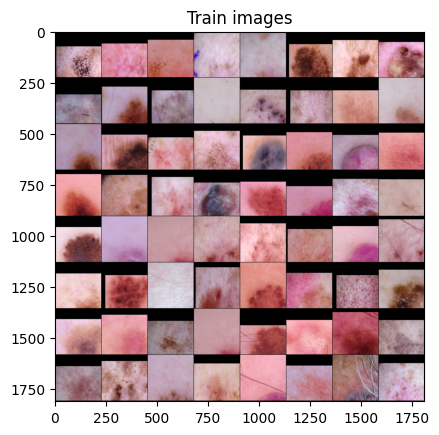

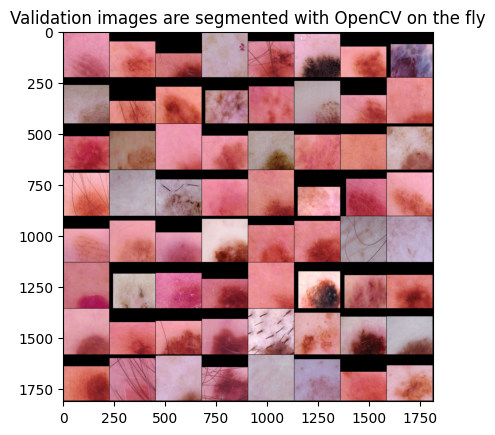

In [5]:
from shared.enums import DynamicSegmentationStrategy


strategy = SegmentationStrategy.DYNAMIC_SEGMENTATION.value
dataloader = get_dataloder_from_strategy(
    strategy=strategy,
    dynamic_segmentation_strategy=DynamicSegmentationStrategy.OPENCV,
    normalize=False,)
train_dataloader, val_dataloader = dataloader.get_train_val_dataloders()
batch = next(iter(train_dataloader))
images, labels = batch
# NOTE: because the dataloader is bugges AF, also the train images are segmented with OpenCV on the fly, while they should be segmented with the ground truth
plot_image_grid(images, "Train images") 
batch = next(iter(val_dataloader))
images, labels = batch
plot_image_grid(images, "Validation images are segmented with OpenCV on the fly")